### Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = boston.data

In [7]:
data.shape

(506, 13)

In [8]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
target = boston.target

In [10]:
feature_names = boston.feature_names

In [11]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Разделение на тренинговый и тестовый датафрейм.

In [13]:
x = pd.DataFrame(data, columns=feature_names)

In [14]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
x.shape

(506, 13)

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [17]:
y = pd.DataFrame(target, columns=['price'])

In [18]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [19]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#### Масштабируем признаки.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
x_train_scaled = scaler.fit_transform(x_train)

In [23]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=feature_names)

In [24]:
x_test_scaled = scaler.transform(x_test)

In [25]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)

#### Построим модель TSNE на тренировочных данных 

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components=2,  learning_rate=150, random_state=42)

In [28]:
x_train_tsne = tsne.fit_transform(x_train_scaled)

In [29]:
x_train_tsne

array([[ 2.85043850e+01, -1.53428383e+01],
       [-9.82618809e+00,  4.75809526e+00],
       [-1.94754124e+01,  1.28484163e+01],
       [ 3.71032944e+01, -1.40044117e+01],
       [-1.96422577e+00, -4.11445332e+00],
       [-1.28060160e+01,  8.61321545e+00],
       [-1.22272930e+01,  6.78572083e+00],
       [-2.84449844e+01,  1.55260458e+01],
       [ 3.79728470e+01, -1.48658323e+01],
       [ 3.93200645e+01, -1.19993143e+01],
       [-1.28855019e+01,  6.71991205e+00],
       [-1.00045004e+01,  1.23842406e+00],
       [-1.31192503e+01, -2.31750131e+00],
       [ 3.81532364e+01, -1.20571175e+01],
       [-1.47511072e+01, -2.02592897e+00],
       [ 6.63107574e-01, -5.17170572e+00],
       [-3.01546240e+00,  4.51767349e+00],
       [-2.05990295e+01,  1.34823685e+01],
       [-1.68186226e+01,  7.97985077e+00],
       [-1.99643936e+01,  1.01811304e+01],
       [ 3.39465637e+01, -1.68142815e+01],
       [-2.99209046e+00,  1.74475265e+00],
       [-1.32219133e+01,  1.00473814e+01],
       [-1.

In [30]:
x_train_tsne.shape

(404, 2)

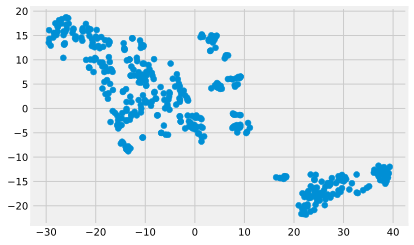

In [31]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

### Задание 2

разобьем данные на три кластера

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [41]:
labels_train = kmeans.fit_predict(x_train_scaled)

In [42]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

In [43]:
labels_test = kmeans.predict(x_test_scaled)

график TSNE

Text(20, -10, 'Кластер 2')

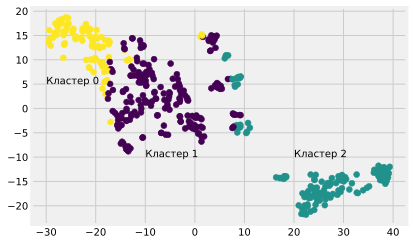

In [44]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1],  c=labels_train)
plt.text(-30, 5, 'Кластер 0')
plt.text(-10, -10, 'Кластер 1')
plt.text(20, -10, 'Кластер 2')

In [45]:
y_train.mean()

price    22.796535
dtype: float64

In [46]:
y_train[labels_train==0].mean()

price    24.958115
dtype: float64

In [47]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [48]:
y_train[labels_train==2].mean()

price    27.788372
dtype: float64

In [49]:
x_train.loc[labels_train==0,'RM'].mean()

6.400094240837695

In [50]:
x_train.loc[labels_train==1, 'RM'].mean()

5.964007874015744

In [51]:
x_train.loc[labels_train==2, 'RM'].mean()

6.6485232558139575

In [52]:
x_train.loc[labels_train==0, 'CRIM'].mean()

0.42166020942408367

In [53]:
x_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [54]:
x_train.loc[labels_train==2, 'CRIM'].mean()

0.07356558139534886

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

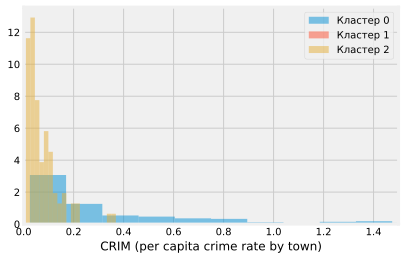

In [55]:
plt.hist(x_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==2, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 1.5)
plt.legend(['Кластер 0', 'Кластер 1','Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')

Text(0.5, 0, 'NOX\nnitric oxides concentration (parts per 10 million)')

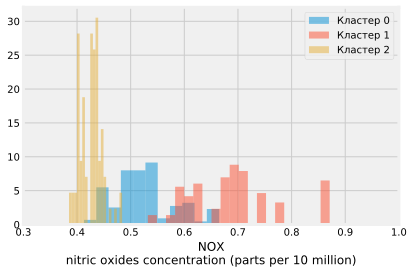

In [70]:
plt.hist(x_train.loc[labels_train==0, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==2, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.xlim(0.3, 1.0)
plt.legend(['Кластер 0', 'Кластер 1','Кластер 2'])
plt.xlabel('NOX\nnitric oxides concentration (parts per 10 million)')

### Задание 3

In [57]:
x_test_tsne = tsne.fit_transform(x_test_scaled)

In [58]:
pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

In [67]:
labels_test = kmeans.predict(x_test_scaled)
labels_test

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

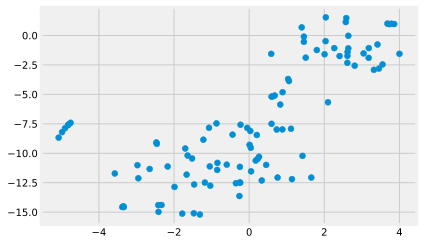

In [66]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1])

In [68]:
labels_test = kmeans.predict(x_test_scaled)

Text(20, -10, 'Кластер 2')

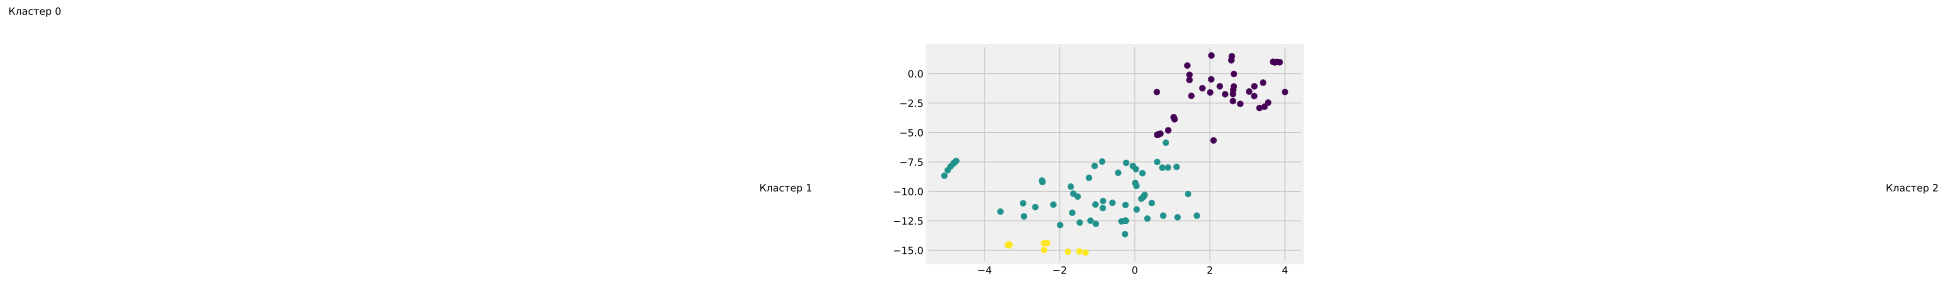

In [69]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1],  c=labels_test)
plt.text(-30, 5, 'Кластер 0')
plt.text(-10, -10, 'Кластер 1')
plt.text(20, -10, 'Кластер 2')